In [1]:
%matplotlib inline
import matplotlib.pylab as pylab

import pymc as mc

import pandas as pd
import numpy as np
import datetime

In [9]:
from .. import vpfits

ValueError: Attempted relative import in non-package

# VPfits

The VPfits module contains a class, `VPfit`, that carries out most of the heavy lifting. First we create an instance of this class.

In [ ]:
vpfit = vpfits.VPfit()

`VPfit` also contains a function for creating mock absoprtion profiles, `mock_absorption`. Just tell it how many features you wish to include. It returns a dataframe, `clouds`, containing each feature, and an array of wavelength values. It can also plot the profile.

In [ ]:
n = 4

clouds, wavelength_array = vpfits.mock_absorption(n=n, plot=True)

The plot shows the profile with added noise, but right now doesn't return this noisy profile, so we recreate it here.

In [ ]:
onesigmaerror = 0.02
noise = np.random.normal(0.0, onesigmaerror, len(wavelength_array))
flux_array = vpfit.Absorption(sum(clouds['tau'])) + noise

To fit, initialise the model with `n` profiles, calculate the MAP estimate, then run the MCMC.

In [3]:
vpfit.initialise_model(wavelength_array, flux_array, n)

NameError: name 'vpfit' is not defined

In [4]:
vpfit.map_estimate()

NameError: name 'vpfit' is not defined

In [20]:
vpfit.mcmc_fit()

 [-----------------100%-----------------] 10000 of 10000 complete in 23.1 sec
Took: 0:00:23.139906  to finish.


Our `VPfit` instance, `vpfit`, now contains the fitted profile components.

We can query some features of the fit useful for model selection, such as the Maximum A Posteriori (MAP) Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC).

In [35]:
print vpfit.MAP.BIC
print vpfit.MAP.AIC

-6816.08994445
-6888.90167643


We also have model selection metrics from the MCMC

In [36]:
print vpfit.mcmc.BPIC
print vpfit.mcmc.DIC

-9946.55649146
-9958.64431227


Finally, we can also plot the fit, with residuals. The fitted components and actual components can be directly compared.

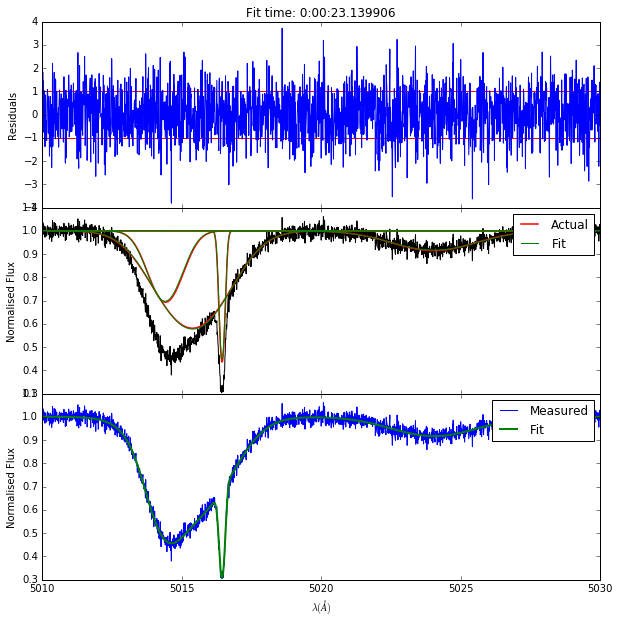

In [37]:
vpfit.plot(wavelength_array, flux_array, clouds, n=n)

## Finding the right number of profiles

In a complicated spectrum, knowing how many components there are can be difficult. `VPfits` can perform model selection on two fits with different numbers of profiles to determine which is the best.

Below is an early implementation using the Bayesian Information Criterion (BPIC) as a threshold.

In [33]:
r = 0
n = 1
vpfit_2 = vpfits.VPfit()
vpfit_2.initialise_model(wavelength_array, flux_array, n)
vpfit_2.map_estimate()

while r < 1:
    
    n += 1
    print "n: ", n
    
    vpfit_1 = vpfit_2
    
    vpfit_2 = vpfits.VPfit()
    vpfit_2.initialise_model(wavelength_array, flux_array, n)
    vpfit_2.map_estimate()
    
    print "Fit 1 BIC: ", vpfit_1.MAP.BIC, ", Fit 2 BIC: ", vpfit_2.MAP.BIC
    print "BIC Ratio: ", vpfit_1.MAP.BIC / vpfit_2.MAP.BIC
    
    r = vpfit_1.MAP.BIC / vpfit_2.MAP.BIC
    
    
n -= 1
print "n (final): ", n
vpfit_1.mcmc_fit()

n:  2
Fit 1 BIC:  -6057.04258675 , Fit 2 BIC:  -6860.79909907
BIC Ratio:  0.882847974309
n:  3
Fit 1 BIC:  -6860.79909907 , Fit 2 BIC:  -7474.18618097
BIC Ratio:  0.917932592653
n:  4
Fit 1 BIC:  -7474.18618097 , Fit 2 BIC:  -8566.35064693
BIC Ratio:  0.872505281306
n:  5
Fit 1 BIC:  -8566.35064693 , Fit 2 BIC:  -6793.91750003
BIC Ratio:  1.26088529142
n (final):  4
 [-----------------100%-----------------] 10000 of 10000 complete in 20.6 sec
Took: 0:00:20.624871  to finish.


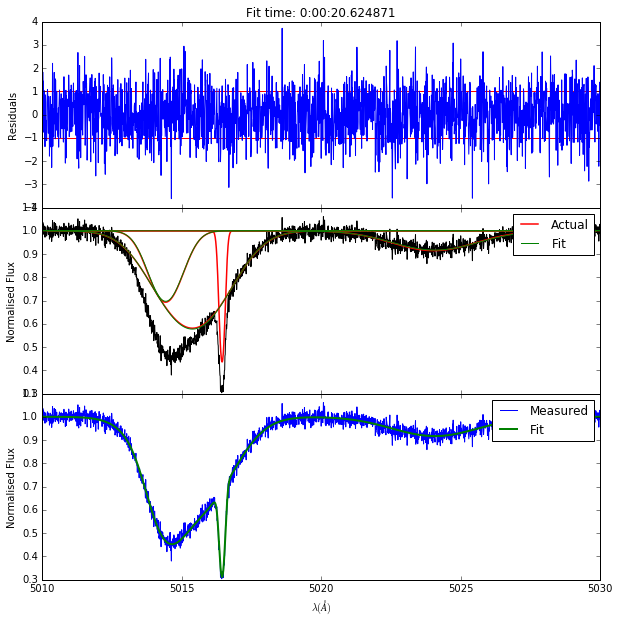

In [34]:
vpfit_1.plot(wavelength_array, flux_array, clouds, n-1)